In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **SVR**

# Example 1

In [ ]:
from sklearn.datasets import load_boston
boston= load_boston()
X= boston.data
y= boston.target
print('===================================================')


In [ ]:
import numpy as np
import pandas as pd
X= pd.DataFrame(X)
miss= X.isnull().sum().sort_values(ascending=False)
miss

12    0
11    0
10    0
9     0
8     0
7     0
6     0
5     0
4     0
3     0
2     0
1     0
0     0
dtype: int64

In [ ]:
X= np.array(X)
miss= np.isnan(X)
print(miss)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y,test_size=0.3, random_state=44, shuffle= True)
print('x_train is',x_train.shape,'\n x_test is',x_test.shape,'\n y_train is',y_train.shape,'\n y_test is',y_test.shape)

x_train is (354, 13) 
 x_test is (152, 13) 
 y_train is (354,) 
 y_test is (152,)


In [ ]:
from sklearn.svm import SVR
svr= SVR(kernel='rbf',C=200,gamma=0.0001, epsilon=0.31,max_iter=3000)
svr.fit(x_train, y_train)
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))
y_pred=svr.predict(x_test)
print(y_test[:6])
print(y_pred[:6])

0.7623978970657206
0.7306103423485035
[17.8 21.5 21.2 32.4 10.9 31.7]
[17.68690269 22.40746095 22.65197264 31.235654    7.80606677 31.20479914]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
from sklearn.metrics import mean_absolute_error
error= mean_absolute_error(y_test,y_pred)
print(error)

3.640288748925285


# Example 2

In [ ]:
from sklearn.svm import SVR
import numpy as np
n_samples=10
n_features = 10
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
print(X.shape)
print(y.shape)
print(y[:5])

(10, 10)
(10,)
[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]


In [ ]:

clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X, y)

newx = np.random.randn(1,10)
y_pred = clf.predict(X)
print(y_pred[:5])
print(clf.score(X,y))


[1.36847949 0.59977671 0.89607659 1.52036116 0.87041581]
0.6074932173715457


**SVC**

# **Example 1**

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer= load_iris()
X= cancer.data
y= cancer.target

In [ ]:
print(X.shape)
print(X[20,3])

(150, 4)
0.2


In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X[20,3])


-1.3154442950077407


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=44,shuffle=True)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf', gamma=0.001,C=1000, max_iter=200)
svc.fit(x_train, y_train)
y_pred= svc.predict(x_test)
print(svc.score(x_train, y_train))
print(svc.score(x_test, y_test))

0.9714285714285714
0.9777777777777777


In [ ]:
print(y_test[:20])
print(y_pred[:20])

[2 0 1 1 2 0 2 2 2 1 0 1 0 2 0 0 2 1 0 2]
[2 0 1 1 2 0 2 2 2 1 0 1 0 2 0 0 2 1 0 2]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]


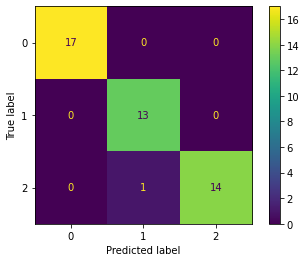

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test, y_pred)
report= classification_report(y_test,y_pred)
print(report)
print(cm)
displ= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
displ.plot()
